In [6]:
from datasets import load_dataset

dataset = load_dataset("quinn-dougherty/fvapps", split="train")

README.md:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/11.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4712 [00:00<?, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

# Collect Stats on Defs and Theorems

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
def theorem_counter(spec: str) -> int:
    """
    This function counts the number of theorems in the spec"""
    return spec.count("theorem")


def def_counter(spec: str) -> int:
    """
    This function counts the number of definitions in the spec"""
    return spec.count("def")


def total_count(spec: str) -> int:
    """
    This function counts the total number of statements in the spec"""
    return spec.count("def") + spec.count("theorem")

In [9]:
counts_data = []

for sample in dataset:
    sample_res = {}
    sample_res["theorem_count"] = theorem_counter(sample["spec"])
    sample_res["def_count"] = def_counter(sample["spec"])
    sample_res["total_count"] = total_count(sample["spec"])
    counts_data.append(sample_res)

counts_df = pd.DataFrame(counts_data)

In [10]:
counts_df.describe()

,theorem_count,def_count,total_count
count,4712.000000,4712.000000,4712.000000
mean,4.183574,1.872241,6.055815
std,1.451707,1.299796,1.984675
min,0.000000,0.000000,2.000000
25%,3.000000,1.000000,5.000000
50%,4.000000,1.000000,6.000000
75%,5.000000,2.000000,7.000000
max,17.000000,29.000000,35.000000


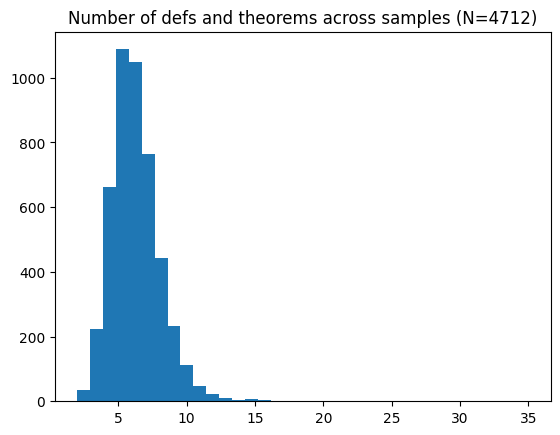

In [31]:
plt.hist(counts_df.total_count, bins=counts_df.total_count.max())
plt.title(f"Number of defs and theorems across samples (N={counts_df.shape[0]})")
plt.savefig("num_defs_theorems_across_samples.png")

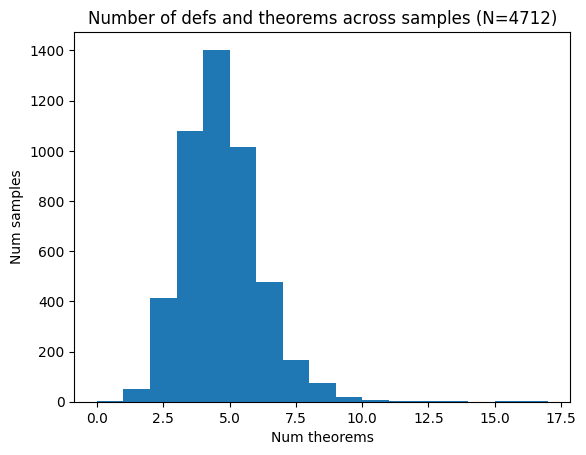

In [38]:
plt.hist(counts_df.theorem_count, bins=counts_df.theorem_count.max())
plt.title(f"Number of defs and theorems across samples (N={counts_df.shape[0]})")
plt.ylabel("Num samples")
plt.xlabel("Num theorems")

plt.savefig("num_theorems_across_samples.png")

In [36]:
counts_df.theorem_count.describe()

count    4712.000000
mean        4.183574
std         1.451707
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        17.000000
Name: theorem_count, dtype: float64

In [37]:
counts_df.theorem_count.sum()

np.int64(19713)